In [ ]:
!git clone https://github.com/SatelliteVu/SatelliteVu-AWS-Disaster-Response-Hackathon.git

fatal: destination path 'SatelliteVu-AWS-Disaster-Response-Hackathon' already exists and is not an empty directory.


In [ ]:
import re
from typing import Dict, List, Optional, Text, Tuple
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from tqdm import tqdm

import tensorflow as tf
import gzip
import csv

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
# !ls  /drive/MyDrive/day_fire_data

In [ ]:
# prefix = '/home/is/myGoogleDrive/day_fire_data'
prefix = '/drive/MyDrive/day_fire_data'

def get_data_frp(i):
  u = []
  #with open(prefix+"drive/MyDrive/day_fire_data/today_frp_" + str(i) + ".csv", mode ='r')as file:
  with gzip.open(prefix+"/today_frp/today_frp_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_tomorrow_data_frp(i):
  u = []
  #with open(prefix+"drive/MyDrive/day_fire_data/today_frp_" + str(i) + ".csv", mode ='r')as file:
  with gzip.open(prefix+"/tomorrow_frp_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_data_fire(i):
  u = []
  #with open(prefix+"drive/MyDrive/day_fire_data/today_frp_" + str(i) + ".csv", mode ='r')as file:
  with gzip.open(prefix+"/today_fire/today_fire_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_tomorrow_data_fire(i):
  u = []
  #with open(prefix+"drive/MyDrive/day_fire_data/today_frp_" + str(i) + ".csv", mode ='r')as file:
  with gzip.open(prefix+"/tomorrow_fire/tomorrow_fire_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_data_landcover(i):
  u = []
  with gzip.open(prefix+"/landcover/today_landcover_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_data_elevation(i):
  u = []
  with gzip.open(prefix+"/elevation/today_elevation_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_wind_speed(i):
  u = []
  with gzip.open(prefix+"/today_wind_speed/today_wind_speed_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_air_pressure(i):
  u = []
  with gzip.open(prefix+"/today_air_pressure/today_air_pressure_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_wind_direction(i):
  u = []
  with gzip.open(prefix+"/today_wind_direction/today_wind_direction_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_temp_max(i):
  u = []
  with gzip.open(prefix+"/today_tmax/today_tmax_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_temp_min(i):
  u = []
  with gzip.open(prefix+"/today_tmin/today_tmin_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_solar_radiation(i):
  u = []
  with gzip.open(prefix+"/solar_radiation/today_solar_radiation_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u


def get_precipitation(i):
  u = []
  with gzip.open(prefix+"/precipitation/today_precipitation_" + str(i) + ".gz", mode ='rt')as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
      p = []
      for y in lines:
        p.append(float(y))
      u.append(p)
  return u

In [ ]:
def my_get_dataset(end):
    data = []
    #labels = []
    start = 0
    end = start + end #100
    for i in tqdm(range(start, end)):
        elevation_data = get_data_elevation(i)
        wind_dir = get_wind_direction(i)
        wind_speed = get_wind_speed(i)
        temp_min = get_temp_min(i)
        temp_max = get_temp_max(i)
        precip = get_precipitation(i)

        air_pressure = get_air_pressure(i)
        solar_radiation = get_solar_radiation(i)
        frp_data = get_data_frp(i)
        landcover_data = get_data_landcover(i)
        f_data = get_data_fire(i)
        #tomorrow_data_frp = get_tomorrow_data_frp(i)
        tomorrow_data_fire = get_tomorrow_data_fire(i)

#         TITLES = [
#           'Elevation',
#           'Wind\ndirection',
#           'Wind\nvelocity',
#           'Min\ntemp',
#           'Max\ntemp',
#           'Humidity',
#           'Precip',
#           'Drought',
#           'Vegetation',
#           'Population\ndensity',
#           'Energy\nrelease\ncomponent',
#           'Previous\nfire\nmask',
#           'Fire\nmask'
#         ]

        data.append([
            elevation_data,
            elevation_data,
            wind_dir,
            wind_speed,
            temp_min,
            temp_max,
            air_pressure,
            precip,
            solar_radiation,
            landcover_data,
            frp_data,
            f_data,
            tomorrow_data_fire
        ])

    return np.array(data)

In [ ]:
#siz = 100
siz = 21540
data = my_get_dataset(siz)
# np.save(data, f'data_{siz}')

100%|██████████| 100/100 [00:10<00:00,  9.20it/s]


In [ ]:
data.shape

(100, 13, 64, 64)

In [ ]:
data = np.transpose(data, (0, 2, 3, 1))
data.shape

(100, 64, 64, 13)

In [ ]:
features = data[:, :, :, :-1]
lbls = data[:, :, :, -1:]


In [ ]:
print(f"features.shape: {features.shape}")
print(f"lbls.shape: {lbls.shape}")

features.shape: (100, 64, 64, 12)
lbls.shape: (100, 64, 64, 1)


In [ ]:

#labels = labels.permute(labels.shape[0], labels.shape[2], labels.shape[3], labels.shape[1])
dataset = tf.data.Dataset.from_tensor_slices((features, lbls)).batch(64)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 12), dtype=tf.float64, name=None), TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float64, name=None))>

In [ ]:
train_dataset, eval_test_dataset = tf.keras.utils.split_dataset(dataset, left_size=0.8)
eval_dataset = eval_test_dataset.take(len(list(dataset)) // 2)
test_dataset = eval_test_dataset.skip(len(list(dataset)) // 2)

#eval_dataset = eval_test_dataset[:len(eval_test_dataset) // 2]
#test_dataset = eval_test_dataset[len(eval_test_dataset) // 2:]
#eval_dataset, test_dataset = tf.keras.utils.split_dataset(eval_test_dataset, left_size=0.5)

In [ ]:
#len(list(dataset))

In [ ]:
#eval_dataset, test_dataset =
#tf.keras.utils.split_dataset(tf.data.Dataset.from_tensor_slices(eval_test_dataset), left_size=0.5)

In [ ]:
inputs, labels = next(iter(train_dataset))
print(inputs.shape)
print(labels.shape)

(64, 64, 64, 12)
(64, 64, 64, 1)


In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
np.set_printoptions(suppress=True)

In [ ]:
TITLES = [
    'elevation',
    'elevation',
    'wind_dir',
    'wind_speed',
    'temp_min',
    'temp_max',
    'air_pressure',
    'precip',
    'solar_radiation',
    'landcover',
    'frp_data',
    'fire',
    'tomorrow_fire'
]

INPUT_FEATURES = TITLES[:-1]
INPUT_FEATURES

['elevation',
 'elevation',
 'wind_dir',
 'wind_speed',
 'temp_min',
 'temp_max',
 'air_pressure',
 'precip',
 'solar_radiation',
 'landcover',
 'frp_data',
 'fire']

In [ ]:
# Number of rows of data samples to plot
n_rows = 10 #inputs.shape[0]
# Number of data variables
n_features = inputs.shape[3]
# Variables for controllong the color map for the fire masks
CMAP = colors.ListedColormap(['black', 'silver', 'orangered'])
BOUNDS = [-1, -0.1, 0.001, 1]
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)
inputs.shape

TensorShape([64, 64, 64, 12])

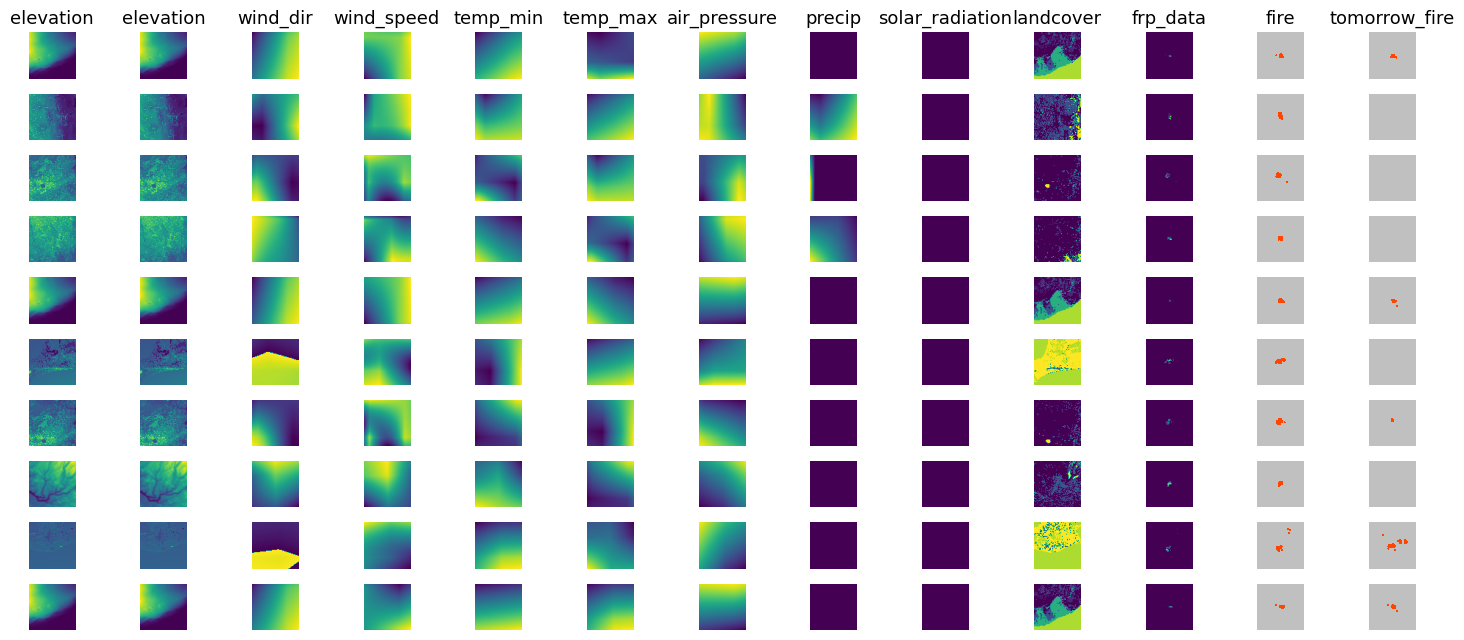

In [ ]:
fig = plt.figure(figsize=(15,6.5))

for i in range(n_rows):
    for j in range(n_features + 1):
        plt.subplot(n_rows, n_features + 1, i * (n_features + 1) + j + 1)
        if i == 0:
            plt.title(TITLES[j], fontsize=13)
        if j < n_features - 1:
            plt.imshow(inputs[i, :, :, j], cmap='viridis')
        if j == n_features - 1:
            plt.imshow(inputs[i, :, :, -1], cmap=CMAP, norm=NORM)
        if j == n_features:
            plt.imshow(labels[i, :, :, 0], cmap=CMAP, norm=NORM)
        plt.axis('off')
plt.tight_layout()

# Training

In [ ]:
!ls -al ./SatelliteVu-AWS-Disaster-Response-Hackathon/deep_learning

total 96
drwxr-xr-x 6 root root  4096 Nov 24 00:37 .
drwxr-xr-x 9 root root  4096 Nov 24 00:12 ..
-rw-r--r-- 1 root root  8636 Nov 24 00:12 classify.ipynb
-rw-r--r-- 1 root root  1463 Nov 24 00:12 config.py
-rw-r--r-- 1 root root  9446 Nov 24 00:12 datagen.py
-rw-r--r-- 1 root root   253 Nov 24 00:12 env.yml
-rw-r--r-- 1 root root  8425 Nov 24 00:12 evaluate_and_visualize.ipynb
drwxr-xr-x 2 root root  4096 Nov 24 00:12 images
drwxr-xr-x 3 root root  4096 Nov 24 00:12 input
-rw-r--r-- 1 root root  2711 Nov 24 00:12 metrics.py
-rw-r--r-- 1 root root  2603 Nov 24 00:12 model_resunet.py
-rw-r--r-- 1 root root  3135 Nov 24 00:12 model_satunet.py
drwxr-xr-x 3 root root  4096 Nov 24 00:12 output
drwxr-xr-x 2 root root  4096 Nov 24 00:37 __pycache__
-rw-r--r-- 1 root root  4091 Nov 24 00:12 README.md
-rw-r--r-- 1 root root 10833 Nov 24 00:12 train.ipynb


In [ ]:
import sys
sys.path.append('./SatelliteVu-AWS-Disaster-Response-Hackathon/deep_learning')

In [ ]:
import model_satunet
# import model_satunet
import glob
import os
import sys
import keras
from metrics import dice_coef, get_loss_function

tf.debugging.set_log_device_placement(True)

# Get loss function
loss_function = get_loss_function('dice_coef_loss')

# Define model architecture
model = model_satunet.get_model([64,64,12])

# Callbacks
#import wandb
#from wandb.keras import WandbCallback

callbacks = list()

# Optional: WandB callback config and init
config = {
    "dataset_id": "NDFP_data",
    "img_size": [64,64],
    "model_architecture": 'satunet',
    "num_layers_satunet": 4,
    "unfreeze_all_layers": False,
    "parent_model_name": None,
    "optimizer": 'adam',
    "learning_rate": 0.0001, # 0.00001,
    "loss_function": 'dice_coef_loss',
    "epochs": 100,
    "batch_size": 64,
    "custom_objects": [
        "dice_coef",
        "focal_tversky_loss"
        ],
    "input_features": INPUT_FEATURES
    }
#wandb.init(project='fire-model', config=config)
#run_name = wandb.run.name
#callbacks.append(WandbCallback())

# Define learning rate schedule callback
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.0001, decay_steps=15, decay_rate=0.96, staircase=True
    )

# Define checkpoints callback
#checkpoint_path = os.path.join('./output', 'model', 'fire_model_{}.h5'.format(run_name))
#checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
#    checkpoint_path, save_weights_only=True, save_best_only=True
#    )
#callbacks.append(checkpoint_cb)

# Define Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
# Compile and train model
model.compile(
    optimizer=optimizer,
    loss=loss_function, metrics=[dice_coef,
                                 tf.keras.metrics.AUC(curve="PR"),
                                 tf.keras.metrics.Precision(),
                                 tf.keras.metrics.Recall()
                                ]
    )

history = model.fit(
    train_dataset,
    validation_data=eval_dataset,
    epochs=100,
    #callbacks=callbacks
)

# Evaluation

In [ ]:
# # Define ResUNet model
# model = model_resunet.get_model([model_config["IMG_SIZE"][0],model_config["IMG_SIZE"][1],len(dataset_config["INPUT_FEATURES"])])

# # Load model weights
# model.load_weights(os.path.join(model_paths[0]))

test_dataset = eval_dataset

import numpy as np

# Get all samples from TFRecords in arrays
first_it = True
for x, y in test_dataset:
    if first_it:
        test_data_inputs = x
        test_data_targets = y
        first_it = False
    else:
        test_data_inputs = np.concatenate((test_data_inputs, x), axis=0)
        test_data_targets = np.concatenate((test_data_targets, y), axis=0)
test_data_inputs = np.asarray(test_data_inputs)
y_true = np.asarray(test_data_targets)

# Predict
y_pred=list()
for sample in tqdm(test_data_inputs):
    sample_exp = np.expand_dims(sample, axis=0)
    #print("\niter\n")
    #print(f"sample_exp.shape: {sample_exp.shape}")
    #im = sample_exp[0, :, :, -1]
    #print(f"im.shape: {im.shape}")
    #plt.imshow(sample_exp[0, :, :, -1], cmap=CMAP, norm=NORM)
    #plt.show()

    pred = model.predict(sample_exp, verbose = 0)

    #print(f"pred.shape: {pred.shape}")
    #plt.imshow(pred[0, :, :, -1], cmap=CMAP, norm=NORM)
    #plt.show()

    y_pred.append(pred)

masks = np.round(y_pred)

In [ ]:
# Evaluate using sklearn
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Flatten results before evaluation
previous_fire_mask_flat = test_data_inputs[:, :, :, -1].flatten()
persistence_mask_flat = previous_fire_mask_flat
y_pred_mask_flat = np.expand_dims(np.array(y_pred).squeeze(), axis=-1).flatten()
masks_flat = masks.flatten()
y_true_flat = y_true.flatten()

# Metrics for predicitions
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true_flat, masks_flat)
print('Accuracy: %f' % accuracy)
score_a = score(y_true_flat, masks_flat)
print("score_a", score_a)
# precision tp / (tp + fp)
precision = precision_score(y_true_flat, masks_flat, average='micro')
print("precision", precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true_flat, masks_flat, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true_flat, masks_flat, average='micro')
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(y_true_flat, masks_flat)
print(matrix)

print("\n")

# # Metrics for baseline
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true_flat, persistence_mask_flat)
print('Accuracy: %f' % accuracy)
score_a = score(y_true_flat, persistence_mask_flat)
print("score_a", score_a)
# precision tp / (tp + fp)
precision = precision_score(y_true_flat, persistence_mask_flat, average='micro')
print("precision", precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true_flat, persistence_mask_flat, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true_flat, persistence_mask_flat, average='micro')
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(y_true_flat, persistence_mask_flat)
print(matrix)

In [ ]:
test_data_inputs.shape

In [ ]:
# Output visualisation
output_titles = ["Input previous day fire mask", "Ground truth next day fire mask", "Predicted next day fire mask" ]

n_rows = 50
n_features = len(output_titles)

CMAP = colors.ListedColormap(['silver', 'orangered'])
BOUNDS = [0., 1.]
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

fig = plt.figure(figsize=(15,160.5))

for i in range(n_rows):
    for j in range(n_features):
        plt.subplot(n_rows, n_features + 1, i * (n_features + 1) + j + 1)
        if i == 0:
            plt.title(output_titles[j], fontsize=13)
        if j == 0:
            plt.imshow(test_data_inputs[i, :, :, -1], cmap=CMAP, norm=NORM)
        if j == 1:
            plt.imshow(y_true[i, :, :, 0], cmap=CMAP, norm=NORM)
        if j == 2:
            plt.imshow(masks.squeeze(axis=1)[i, :, :, 0], cmap=CMAP, norm=NORM)
        plt.axis('off')
plt.tight_layout()